<a href="https://colab.research.google.com/github/Moysezg/Bondad-de-Ajuste-de-Chi-cuadrado/blob/main/Inventario_con_simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


#Inventario con simpy (ZGM)

###1. Llamamos a las funciones para instalar simpy y poder trabajar con él, para poder gráficar y realizar algunas operaciones matemáticas (operaciones con matrices).



In [2]:
!pip install simpy  # Función que sirve para instalar simpy.
import simpy # Se llama la función simpy que es con la que se trabajara.
import numpy as np #  NumPy sirve para usar matrices y operaciones numéricas en Python.
import matplotlib.pyplot as plt #La función sirve para hacer gráficos


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Esto define la función warehouse_run con tres parámetros: env, order_cutoff y order_target. env es el entorno de simulación de SimPy, mientras que order_cutoff y order_target son valores que determinan cuándo se debe realizar un pedido y cuánto inventario se debe tener como objetivo.
## Es la demanda y el uso de inventario.

In [3]:

def warehouse_run(env, order_cutoff, order_target):
  global inventory, balance, num_ordered

  inventory = order_target #El inventario será igual al order_target que es el objetivo.
  balance = 0.0 #Balance es el valor monetario.
  num_ordered = 0 #Indica los pedidos en proceso.

  while True:
    interarrival = generate_interarrival()  #tiempo entre llegadas de los pedidos al almacén.
    yield env.timeout(interarrival) #Con yield, la ejecución se suspende.
    balance -= inventory*2*interarrival # Se descuenta del balance el costo de mantener el inventario durante el intervalo de tiempo interarrival.
    demand = generate_demand() #demanda de productos.
    if demand < inventory:
      balance += 100*demand #Si la demanda es menor, se agrega al balance el beneficio de vender la cantidad demandada multiplicada por 100.
      inventory -= demand
      print ('{:.2f} sold {}'.format(env.now, demand)) #Da mensaje indicando el tiempo actual y la cantidad de productos vendidos.
    else:
      balance += 100*inventory  #Se agrega al balance el beneficio de vender todo el inventario multiplicado por 100.
      inventory = 0 #Se tendrá un inventario de 0 porque la demanda supero el inventario.
      print ('{:.2f} sold {} (out of stock)'.format(env.now,inventory)) #Manda un mensaje diciendo que el inventario se agoto.
    if inventory < order_cutoff and num_ordered == 0:
      env.process(handle_order(env, order_target)) #Se verifica siel inventario está en orden y no hay ningún pedido en proceso



 ## Simula el proceso de manejo de pedidos en el almacén. Calcula la cantidad de productos que se deben pedir, actualiza el balance y el inventario, y muestra el pedido y la recepción de productos.

In [4]:
def handle_order(env, order_target):
  global inventory, balance, num_ordered # Al declarar las variables de está forma, se pueden modificar sus valores dentro de la función.

  num_ordered = order_target - inventory #Cálcula la cantidad de unidades que se deben pedir para alcanzar el objetivo.
  print ('{:.2f} placed order for {}'.format(env.now, num_ordered)) #Indica el número de envios y la cantidad de pedidos.
  balance -= 50*num_ordered   #Resta el costo de los productos de balance.
  yield env.timeout(2.0) #La función yield suspende el proceso durante 2.0 unidades de tiempo
  inventory += num_ordered #Añade los productos al inventario existente.
  num_ordered = 0 #Se restablece a 0 porque los demandas han sido satisfechas.
  print('{:.2f} received order, {} in inventory'.format(env.now, inventory)) # Indica los productos que hay en el inventario despúes de recibir el pedido.



## Estas funciones se utilizan para generar datos aleatorios, como el tiempo entre llegadas de pedidos y la demanda de productos, y una lista para almacenar observaciones del nivel de inventario.

In [5]:
def generate_interarrival():
  return np.random.exponential(1./5) #Número aleatorio con distribución exponencial entre 1 y 5.

def generate_demand():
  return np.random.randint(1, 5) #Número aleatorio entre 1 y 5

obs_time = [] #Lista para guardar las observaciones del tiempo.
inventory_level = [] #lista para guardar el nivel de inventario.



## "observe" es una función de SimPy y se utiliza para realizar observaciones periódicas del nivel de inventario.

In [6]:
def observe(env):
  global inventory

  while True:
    obs_time.append(env.now) #son observaciones que pueden cambiar su valor númerico en la función, representando el tiempo de la observación.
    inventory_level.append(inventory) # Se agrega el valor alctual del inventario a la lista.
    yield env.timeout(0.2) #se suspende el proceso con "yield" durante 0.2 unidades de tiempo para que la simulación avance antes de la siguiente observación.



## A continuación, se establece la semilla para la generación de números aleatorios, inicia los procesos para simular el almacén y observar el nivel de inventario, ejecuta la simulación durante un tiempo determinado y luego traza un gráfico del nivel de inventario a lo largo del tiempo representando la simulación y el nivel de inventario.

0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.61 sold 2
1.97 sold 1
1.99 sold 4
1.99 placed order for 28
2.08 sold 2
2.38 sold 4
2.79 sold 4
3.11 sold 4
3.26 sold 4
3.28 sold 1
3.46 sold 2
3.99 received order, 29 in inventory
4.04 sold 4
4.06 sold 4
4.06 placed order for 29
4.12 sold 4
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.82 sold 1
4.92 sold 1
5.15 sold 3
5.34 sold 2
5.58 sold 2
6.06 received order, 33 in inventory
6.28 sold 3
6.50 sold 3
6.59 sold 1
6.67 sold 2
6.67 placed order for 26
6.75 sold 3
6.86 sold 1
7.50 sold 4
7.55 sold 4
8.62 sold 1
8.67 received order, 37 in inventory
8.68 sold 4
8.81 sold 3
8.84 sold 2
9.06 sold 1
9.09 sold 2
9.69 sold 4
9.69 placed order for 29


Text(0, 0.5, 'Inventory level')

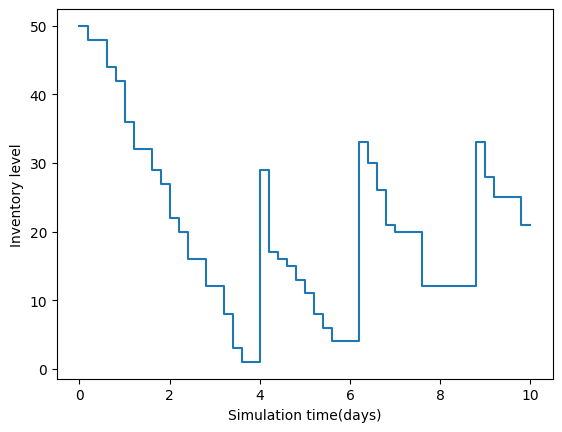

In [7]:
np.random.seed(0) #se establece la semilla.

env = simpy.Environment() #Es para realizar la simulación.
env.process(warehouse_run(env, 25, 50)) #Con warehouse_run simula el funcionamiento del almacen, con un nivel mínimo de inventario de 25 y con 50 que es la cantidad objetiva.
env.process(observe(env)) #Se observa el proceso de la simulación con la variable Enviorement (env) de simpy.

env.run(until = 10.0) #Se ejecuta hasta alcanzar 10.0 unidades de tiempo.

plt.figure() # Se traza el gráfico.
plt.step(obs_time, inventory_level, where = 'post') #Sirve para trazar el gráfico escalonado.
plt.xlabel('Simulation time(days)') # Titulo del eje "X"
plt.ylabel('Inventory level') #Titulo del eje "Y"

<!--NAVIGATION-->
< [7.0 Discrete Event Systems](https://jckantor.github.io/cbe30338-2021/07.00-Discrete-Event-Systems.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.2 Agent Based Models](https://jckantor.github.io/cbe30338-2021/07.02-Agent-Based-Models.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/07.01-Introduction-to-Simpy.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/07.01-Introduction-to-Simpy.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>